In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
dingdan=pd.read_excel('1.xlsx',0)
songhuo=pd.read_excel('1.xlsx',1)
title=dingdan.columns

In [99]:
for i in range(dingdan.shape[0]):
    if dingdan.iloc[i]['材料分类']=='A':
        for j in range(2,len(title)):
            dingdan.loc[i,title[j]]=dingdan.loc[i][j]/0.6
    if dingdan.iloc[i]['材料分类']=='B':
        for j in range(2,len(title)):
            dingdan.loc[i,title[j]]=dingdan.loc[i][j]/0.66
    if dingdan.iloc[i]['材料分类']=='C':
        for j in range(2,len(title)):
            dingdan.loc[i,title[j]]=dingdan.loc[i][j]/0.72
for i in range(songhuo.shape[0]):
    if songhuo.iloc[i]['材料分类']=='A':
        for j in range(2,len(title)):
            songhuo.loc[i,title[j]]=songhuo.loc[i][j]/0.6
    if songhuo.iloc[i]['材料分类']=='B':
        for j in range(2,len(title)):
            songhuo.loc[i,title[j]]=songhuo.loc[i][j]/0.66
    if songhuo.iloc[i]['材料分类']=='C':
        for j in range(2,len(title)):
            songhuo.loc[i,title[j]]=songhuo.loc[i][j]/0.72

In [103]:
songhuo.to_excel('songhuo_norm.xlsx')
dingdan.to_excel('dingdan_norm.xlsx')

In [301]:
dingdan24=dingdan[title[:2]]
songhuo24=dingdan[title[:2]]
blank=[0 for i in range(dingdan.shape[0])]
for i in range(2,24+2):
    dingdan24[title[i]+'_avg']=blank
    dingdan24[title[i]+'_var']=blank
    
    songhuo24[title[i]+'_avg']=blank
    songhuo24[title[i]+'_eft_avg']=blank
    songhuo24[title[i]+'_eft_var']=blank

dingdan24['total_var']=blank

songhuo24['total_avg']=blank
songhuo24['total_avg_var']=blank
songhuo24['total_eft_avg']=blank
songhuo24['total_eft_var']=blank
songhuo24['max_sup']=blank
songhuo24['cmp']=blank

C:\Users\18249\AppData\Local\Temp/ipykernel_60780/2914447085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dingdan24[title[i]+'_avg']=blank
C:\Users\18249\AppData\Local\Temp/ipykernel_60780/2914447085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dingdan24[title[i]+'_var']=blank
C:\Users\18249\AppData\Local\Temp/ipykernel_60780/2914447085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [302]:
for idx in range(dingdan.shape[0]):
    alllist=[]
    for i in range(1,25):
        ten=[]
        for j in range(1,241,24):
            ten.append(dingdan[title[j+i]].iloc[idx])
        ten=pd.Series(ten)
        alllist.append(ten.var())
        dingdan24[title[i+1]+'_avg'].loc[idx]=ten.mean()
        dingdan24[title[i+1]+'_var'].loc[idx]=ten.var()
    dingdan24['total_var'].loc[idx]=pd.Series(alllist).mean()

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [343]:
for idx in range(dingdan.shape[0]):
    alleft=[]
    allsup=[]
    for i in range(1,25):
        ten=[]
        avg=[]
        for j in range(1,241,24):
            if dingdan[title[j+i]].iloc[idx]==0:
                continue
            elif songhuo[title[j+i]].iloc[idx]==0:
                ten.append(0)
                avg.append(0)
            else:
                ten.append(songhuo[title[j+i]].iloc[idx]/dingdan[title[j+i]].iloc[idx])
                
                avg.append(songhuo[title[j+i]].iloc[idx])
        if ten:
            ten=pd.Series(ten)
            avg=pd.Series(avg)
            songhuo24[title[i+1]+'_avg'].loc[idx]=avg.mean()
            songhuo24[title[i+1]+'_eft_avg'].loc[idx]=ten.mean()
            songhuo24[title[i+1]+'_eft_var'].loc[idx]=ten.std()
            alleft.append(ten.mean())
            allsup.append(avg.mean())
    songhuo24['total_avg'].loc[idx]=pd.Series(allsup).mean()
    songhuo24['total_avg_var'].loc[idx]=pd.Series(allsup).std()
    songhuo24['total_eft_avg'].loc[idx]=pd.Series(alleft).mean()
    songhuo24['total_eft_var'].loc[idx]=pd.Series(alleft).std()
    songhuo24['cmp'].loc[idx]=list((pd.Series(alleft)>=1)).count(True)/len(alleft)
    songhuo24['max_sup'].loc[idx]=max(allsup)*songhuo24['cmp'].loc[idx]*sum(pd.Series(alleft)>pd.Series(alleft).mean())/len(allsup)
    

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [320]:
songhuo24.to_excel('songhuo24.xlsx')
dingdan24.to_excel('dingdan24.xlsx')

Text(0.5, 1.0, '企业对402家供货商满意分布图')

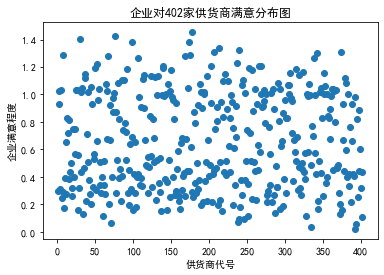

In [305]:
x=songhuo24['total_eft_avg']
y=range(1,len(x)+1)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.scatter(y,x)
plt.xlabel('供货商代号')
plt.ylabel('企业满意程度')
plt.title('企业对402家供货商满意分布图')

Text(0.5, 1.0, '402家供货商平均供货量分布图')

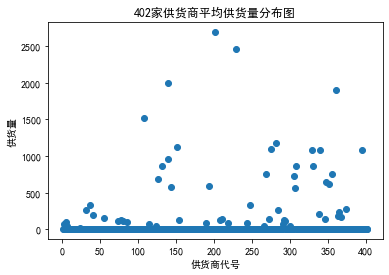

In [306]:
x=songhuo24['total_avg']
y=range(1,len(x)+1)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.scatter(y,x)
plt.xlabel('供货商代号')
plt.ylabel('供货量')
plt.title('402家供货商平均供货量分布图')

Text(0.5, 1.0, '402家供货商订单完成率分布图')

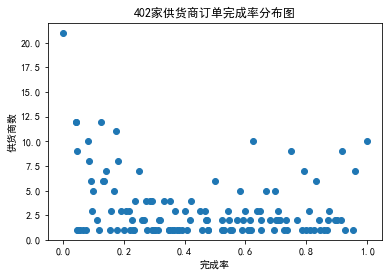

In [307]:
x=sorted(songhuo24['cmp'].value_counts().keys())
y=[ songhuo24['cmp'].value_counts()[i] for i in x]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.scatter(x,y)
plt.xlabel('完成率')
plt.ylabel('供货商数')
plt.title('402家供货商订单完成率分布图')

Text(0.5, 1.0, '402家供货商最大产能分布图')

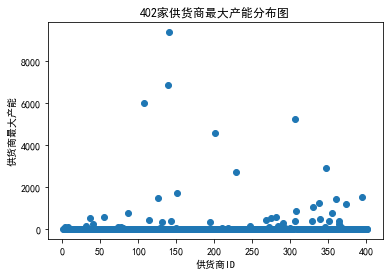

In [353]:
x=songhuo24['max_sup']
y=range(1,len(x)+1)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.scatter(y,x)
plt.xlabel('供货商ID')
plt.ylabel('供货商最大产能')
plt.title('402家供货商最大产能分布图')

In [348]:
import seaborn as sns
relative=songhuo24[['total_avg','total_eft_avg','total_eft_var','cmp','max_sup']]
relative.columns=['平均供货量','平均满意程度','满意程度方差','订单完成率','最大产能']
relative.corr()
sns.heatmap(relative.corr())

,平均供货量,平均满意程度,满意程度方差,订单完成率,最大产能
平均供货量,1.000000,0.238795,-0.419445,0.246037,0.728707
平均满意程度,0.238795,1.000000,-0.163275,0.955632,0.206274
满意程度方差,-0.419445,-0.163275,1.000000,-0.180866,-0.236365
订单完成率,0.246037,0.955632,-0.180866,1.000000,0.220256
最大产能,0.728707,0.206274,-0.236365,0.220256,1.000000


<AxesSubplot:>

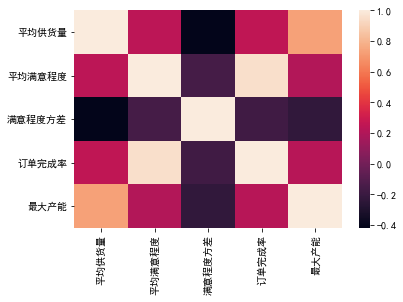

In [344]:
songhuo24[['供应商ID','total_avg','total_eft_avg','total_eft_var','cmp','max_sup']].to_excel('5个指标.xlsx')

In [345]:
import pandas as pd
import numpy as np
data = pd.read_excel("5个指标.xlsx", index_col = 1)
del data['Unnamed: 0']



In [346]:
A = data.values
B = np.zeros((data.shape[0],5))
for i in range(0, A.shape[1]):
    B[:, i] = A[:, i]/np.linalg.norm(A[:, i])
w = np.array([0.1 ,0.1,0.15,0.4,0.25])
C = B * w.T 
Cstar = C.max(axis=0)
#Cstar[1] = C[:, 1].min()
Cstar[3] = C[:, 3].min()
C0 = C.min(axis=0) 
Cstar[3] = C[:, 3].max()
Sstar = np.zeros((1,402))
S0 = np.zeros((1,402))
for i in range(0, C.shape[0]):
    Sstar[:, i] = np.linalg.norm(C[i, :]-Cstar) 
    S0[:, i] = np.linalg.norm(C[i, :]-C0)
f = S0/(S0 + Sstar)
data['得分']=f.T
data.sort_values(by=['得分'],ascending=False,inplace=True)
data.to_excel('排名2.xlsx')

In [284]:
Cstar

array([0.12689961, 0.28837326, 0.00405534, 0.01079892, 0.00943162])

In [285]:
B

array([[1.18730321e-04, 9.54595686e-05, 1.98038489e-02, 3.84864996e-02,
        3.80062228e-03],
       [7.76540336e-04, 7.22788937e-04, 6.24029820e-02, 5.28780761e-02,
        4.18068451e-02],
       [1.25153008e-02, 7.09631452e-03, 6.85508473e-02, 2.67910900e-02,
        7.98130678e-02],
       ...,
       [2.04661234e-04, 2.54551228e-04, 2.12564689e-02, 5.21202777e-02,
        3.96586672e-03],
       [1.99921474e-04, 1.47659606e-04, 2.94010755e-02, 5.36335487e-02,
        1.24384002e-02],
       [9.62653310e-05, 1.56596771e-04, 7.24376079e-03, 2.72936947e-02,
        4.14613339e-03]])